# Correlation, regression, and prediction

One of the most important and interesting aspects of data science is making predictions about the future. How can we learn about temperatures a few decades from now by analyzing historical data about climate change and pollution? Based on a person's social media profile, what conclusions can we draw about their interests? How can we use a patient's medical history to judge how well he or she will respond to a treatment?

In this module, you will look at two **correlated** phenomena and predict unseen data points!

In order to use the datascience tools in python, we must first import the relevant modules. The text after the # sign is called a "comment" and is not part of the code. It's simply a way for us to clarify the syntax.

In [1]:
# These lines import the Numpy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

We will be using data from the online data archive of Prof. Larry Winner of the University of Florida. The file *hybrid* contains data on hybrid passenger cars sold in the United States from 1997 to 2013. In order to analyze the data, we must first **import** it to our jupyter notebook and **create a table.**

In [2]:
hybrid = Table.read_table('http://inferentialthinking.com/notebooks/hybrid.csv') # Imports the data and creates a table
hybrid # Displays the table

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


*References: vehicle: model of the car, year: year of manufacture, msrp: manufacturer's suggested retail price in 2013 dollars, acceleration: acceleration rate in km per hour per second, mpg: fuel econonmy in miles per gallon, class: the model's class.*

**Note: whenever we write an equal sign (=) in python, we are assigning somthing to a variable.**

Now try to import your own data to this notebook! Remeber to assign your data to a variable that is informative but not too wordy.

In [3]:
# TASK

Let's visualize some of the data to see if we can spot a possible assocation! The modules we imported earlier include several powerful data visualization tools. Below are some interesting, possible relationships between our variables.

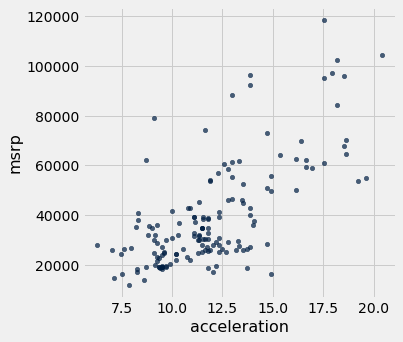

In [4]:
hybrid.scatter('acceleration', 'msrp') # Creates a scatter plot of two variables in a table

As we can see in the above scatter, there seems to be a positive association between acceleration and price. That is, cars with greater acceleration tend to cost more, on average; conversely, cars that cost more tend to have greater acceleration on average.

What about miles per gallon and price? Do you expect a positive or negative association?

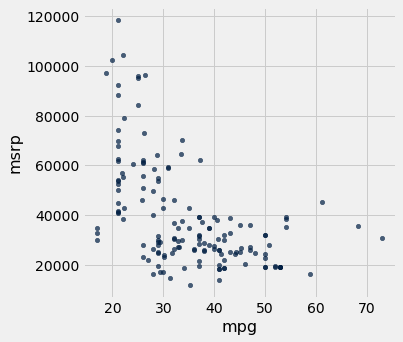

In [5]:
hybrid.scatter('mpg', 'msrp')

Along with the negative association, the scatter diagram of price versus efficiency shows a **non-linear relation** between the two variables. The points appear to be clustered around a curve, not around a straight line.

As you may have noticed, python offers a relatively easy to understand syntax. Try figuring out what the code below will display!

In [6]:
# TASK

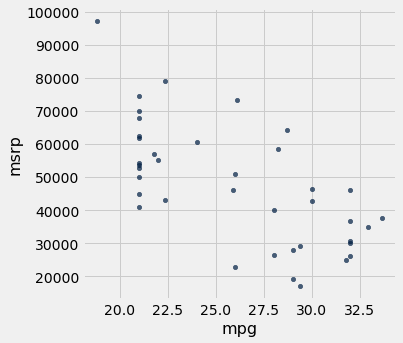

In [7]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

As you can see, if we restrict the data just to the **SUV class**, the association appears to be more linear.

To find an association between two variables, the *.scatter* method is perhaps the most useful one. 
Try creating a few scatter plots of variables you might think are related among your data!

In [8]:
# TASK

### Standard Units

Once you've analyzed your scatter plots and found a possible assocation it's time to manipulate the data. Converting our data points into standard units means we are **subtracting the mean** and **dividing by the standard deviation.**

As we will see, standard units are frequently used in data analysis. To make things easier, we've created a function that takes an array of numbers and returns an array of the numbers converted into standard units. To tell python we are defining a function, we write "def" followed by the code for the function.

In [9]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

# Note: np.mean and np.std respectively calculate the mean and SD of an array of numbers

As you may have figured out, the variable "any numbers" will be replaced by our input when we use the function. To try this function out, we write the name of our table followed by .column("column name"). The .column method let's us access specific columns in our table and the data within that column.

In [10]:
# Remember, "hybrid" is the name of our table

standard_units(hybrid.column('acceleration'))

array([-1.53500863, -1.28250064, -1.36098285, -0.83208097, -1.67832398,
       -0.83208097, -0.76724784, -1.23814113, -0.83208097, -1.13918529,
       -0.55909936, -0.89008957, -0.70241471, -0.97880859,  0.27349457,
       -1.47700004,  0.27349457, -0.76724784, -1.26202702, -0.83208097,
        1.0139572 , -0.28953001, -1.01634356, -0.23152142,  2.28332172,
       -0.9208    ,  0.45434489, -0.35777542,  0.27349457,  1.90455973,
       -0.23152142,  0.1097056 , -0.3714245 , -0.41237174, -0.15986374,
       -1.11188713, -0.97880859, -0.83208097,  0.59424797, -1.39510556,
        0.51576576,  0.21889825, -0.80478281,  0.6590811 , -0.13939012,
       -0.13939012, -0.59663433,  2.04787507, -0.13939012, -0.97880859,
        0.59424797,  0.52941484, -1.23814113, -1.06070308, -0.92762454,
       -0.92762454,  1.16750936,  0.72391424,  0.03122339, -1.64420128,
        2.88388127, -0.27588093, -1.26202702,  0.93547499,  0.93888726,
       -0.95151043,  2.28332172, -0.40213493,  0.13359149, -0.15

The first scatter plot we created (acceleration and price) seems to display a positive relationship. To calculate the correlation between the two variables, we first convert the data into standard units using our function.

In [11]:
# Converts the data into standard units and assigns to variables
acceleration_su = standard_units(hybrid.column('acceleration'))
msrp_su = standard_units(hybrid.column('msrp'))

Now try to convert your own variables into standard units!

In [18]:
# TASK
# Hint: start by using the .column method to access the data you want to convert

Awesome! Now we're ready to calculate the correlation coefficient!

### The correlation coefficient

*Definition: the average of the products of the two variables, when both variables are measured in standard units.*

Try figuring out how the below function works and relates to the above definition!

In [70]:
# TASK (more challenging)
# Hint: start with the inside of the function and work your way out

In [69]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

As you may have seen, in python, we can have **functions within functions.** This is very common and something that allows us to create functions that are very simple to use, yet very powerful.

Let's calculate the correlation coeffcient between acceleration and price!

In [20]:
correlation(hybrid,'acceleration','msrp')

0.69557789969139783

Now it's your turn to calculate the correlation coefficient. Keep in mind that r is a number between −1 and 1.

**r = 1: the scatter diagram is a perfect straight line sloping upwards.**

**r = -1: the scatter diagram is a perfect straight line sloping downwards.**

In [21]:
# TASK

### Regression

As mentioned earlier, an important tool in data science is to make predictions based on data. The code that we've created so far has helped us establish a relationship between our two variables. Once a relationship has been established, it's time to create a model that predicts unseen data values. To do this we'll find the equation of the **regression line**!

The regression line is the **best fit** line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! Below is a picture showing the best fit line.

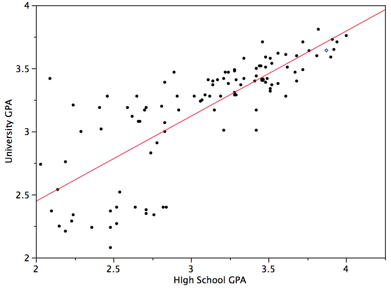

In [22]:
from IPython.display import Image
Image("http://onlinestatbook.com/2/regression/graphics/gpa.jpg")

As you can infer from the picture, once we find the **slope** and the **y-intercept** we can start predicting values!

*Slope of the regression line = r⋅(SD of y / SD of x)*

*Intercept of the regression line = average of y − slope⋅average of x*

(The above equations can be derived from the fact that the estimate of y = r⋅x (when measured in standard units), but it's not essential to understand in this module)

In [30]:
# The code below writes out the above equations in python language. The syntax should look familiar!

def slope(t, x, y):
    r1 = correlation(t, x, y)
    return r1 * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

Let's calculate the slope and intercept for our data! Before we start, let's create a new table with only the two variables we are interested in (the ones we used to calculate the correlation coefficient). The *.select* method let's us pick specific columns in our data.

In [31]:
new_table = hybrid.select('acceleration','msrp') #Picks columns from hybrid and creates a new table with those columns
new_table

acceleration,msrp
7.46,24509.7
8.2,35355
7.97,26832.2
9.52,18936.4
7.04,25833.4
9.52,19036.7
9.71,19137
8.33,38084.8
9.52,19137
8.62,14071.9


Try creating a new table of the columns you calculated the correlation coefficient of earlier!

In [25]:
# TASK

Let's assign all the values to variables!

In [32]:
r = correlation(new_table,'acceleration','msrp')
m = slope(new_table,'acceleration','msrp')
b = intercept(new_table,'acceleration','msrp')

# Note: 
# r = correlation coefficient
# m = slope
# b = y-interncept

Now try calculating all the values above for your data and assign them to variables!

In [27]:
# TASK
# Hint: remember to use the table you just created!

### Prediction

Almost there! As we know from math, **y = m⋅x + b** for a linear equation

*Note: in our data y = price of car and x = acceleration*

Let's predict the price of a car that has an acceleration of 10!

In [58]:
price = m * 10 + b
price

29394.436990853057

Now it's you turn, try prediciting one of your data points based on the values you calculated!

In [29]:
# TASK

To check our model, let's see how accurate our predictions was.

In [65]:
# The method .where let's us "filter" our data and only look at certain data points

close = hybrid.where('acceleration',are.between(9.7,10.3)).select('acceleration','msrp')
close

acceleration,msrp
9.71,19137
9.9,20355.6
9.71,19387.8
10.21,21872.7
9.71,30082.2
10,30588.3
10.2,24360
10.2,24200
10,41555


A commonly used error measure in data science is RMSE.

**R**oot **M**ean **S**quared **E**rror =  The square root of the mean of the square of all of the errors

In [67]:
rms_error = np.sqrt(np.mean((price - close.column('msrp'))**2))
rms_error

7786.9551617196885

Lastly, calculate the RMSE for your prediction!

In [68]:
# TASK

That's it! By working through this model, you've learned how to **visually analyze your data**, **establish a correlation** by calculating the **correlation coefficient**, **finding the regression line** and **predicting data points**, and finally **checking the accuracy of your prediction**!

#### Possible additional material: effect of outliers, ecological correlation